In [1]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [2]:
#!pip install librosa
#!pip install librosa.display

In [3]:
#!pip install matplotlib
import matplotlib.pyplot as plt


In [4]:
filename='/home/mando/RoDia/real_data/data/train/Ard/0aa047c8-9a42-44f0-8de1-c03ec5696175_split0.wav'

In [5]:
import IPython.display as ipd
import librosa

In [6]:
!dir

Audio\ Classification\ EDA.ipynb  saved_models
data				  simplelangiadeclassifierRodia.ipynb
README.md			  test.csv
real_data			  train.csv


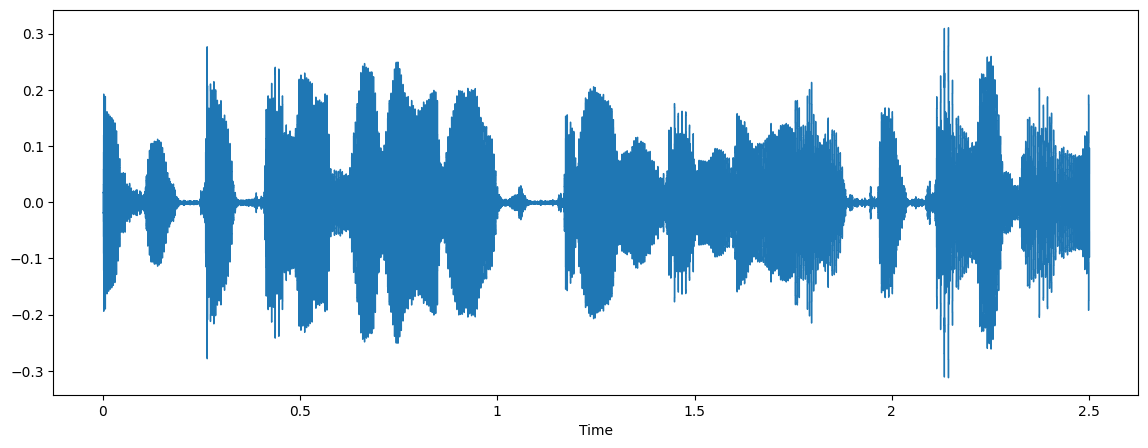

In [7]:
### ard
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

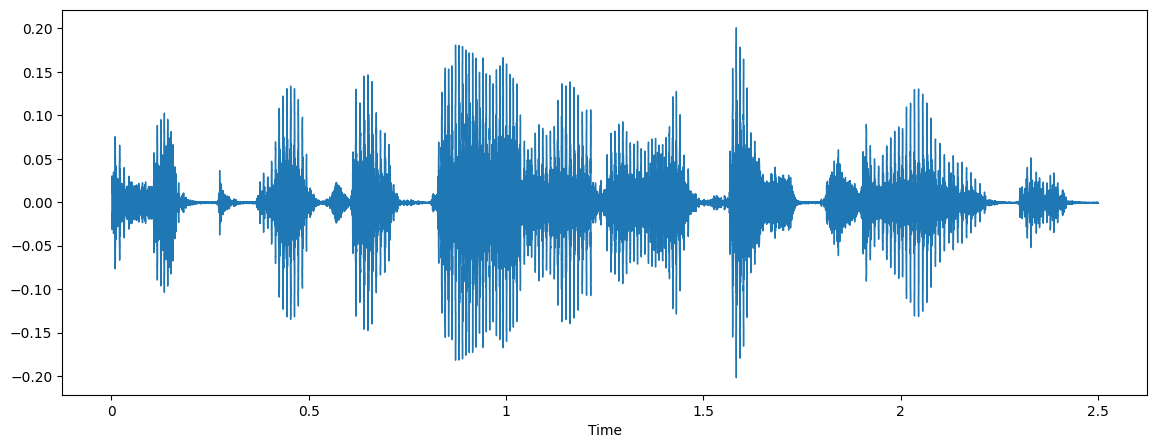

In [8]:
### mun
filename='/home/mando/RoDia/real_data/data/train/Mun/0ec08e2d-deaf-437b-8007-e5265f4dfee7_split2.wav'
#filename=file_name
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [9]:
sample_rate


22050

In [10]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [11]:
wave_sample_rate

44100

In [12]:
wave_audio

array([535, 597, 635, ...,  -5,  -6,  -5], shape=(110250,), dtype=int16)

In [13]:
data

array([ 0.01247178,  0.02058296,  0.02035873, ..., -0.00015562,
       -0.00014853, -0.00017633], shape=(55125,), dtype=float32)

In [14]:
import pandas as pd

metadata=pd.read_csv('/home/mando/RoDia/train.csv')
metadata.head(10)


,Unnamed: 0,file_name,sr,length,srr,snr,label,age_group,gender,label_name
0,0,e6447270-b20d-44c9-811a-2c4b77b66955_split0.wav,44100,110250,39.904151,32.541331,0,50-60,M,Banatean
1,1,a306ab0c-7d07-4b2d-8bf6-46a7ae35d8f0_split1.wav,44100,110981,39.808670,33.237705,2,50-60,F,Ardelenesc
2,2,afd4ddcb-3d68-440a-b289-a936a362fd3b_split1.wav,44100,110981,15.669985,10.927279,0,60+,M,Banatean
3,3,fead3c56-b11a-4133-a220-148e136ce442_split0.wav,44100,110250,39.949465,30.589778,2,40-50,F,Ardelenesc
4,4,63de6abe-429d-4133-8d2a-9517dbde1298_split1.wav,44100,110981,37.915554,19.477879,1,20-30,M,Muntenesc
5,5,7a499e2e-0ccb-4f23-af64-ecc19852670e_split1.wav,44100,154757,39.964177,24.845704,0,60+,M,Banatean
6,6,e6ef5465-3dd9-47e7-b164-1d79e9bf04d2_split1.wav,44100,110981,39.906755,24.245725,2,30-40,M,Ardelenesc
7,7,f6eeecb6-848a-4a74-a5eb-77b2bca4776e_split0.wav,44100,110250,39.908039,31.870560,1,30-40,F,Muntenesc
8,8,210b1a6a-9355-44fa-aa6b-778a638e4943_split0.wav,44100,110250,39.567955,9.392025,0,30-40,M,Banatean
9,9,66590912-e485-435a-a17b-ab4f222d90f6_split1.wav,44100,110981,30.860181,23.159548,1,30-40,F,Muntenesc


In [15]:
metadata['label_name'].unique()

array(['Banatean', 'Ardelenesc', 'Muntenesc', 'Moldovenesc', 'Oltenesc'],
      dtype=object)

In [16]:
### Check whether the dataset is imbalanced
metadata['label_name'].value_counts()

label_name
Muntenesc      603
Ardelenesc     427
Banatean       424
Moldovenesc    384
Oltenesc       326
Name: count, dtype: int64

In [17]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 108)


In [18]:
mfccs

array([[-3.6126703e+02, -3.3682382e+02, -3.5872314e+02, ...,
        -6.0644946e+02, -6.7172064e+02, -6.8652240e+02],
       [ 1.4810916e+02,  1.0970787e+02,  4.8935913e+01, ...,
         8.7671791e+01,  6.2107483e+01,  4.8038719e+01],
       [ 2.9176485e+01,  3.9808537e+01,  6.2671558e+01, ...,
         4.1372005e+01,  3.7002716e+01,  2.8721325e+01],
       ...,
       [-4.7592843e-01, -3.8670917e+00, -6.4537630e+00, ...,
        -4.9585171e+00,  3.4584683e-01, -8.7644273e-01],
       [-4.2509222e+00, -2.4076433e+00, -5.2286015e+00, ...,
        -4.4777279e+00, -4.1061602e+00, -2.3279986e+00],
       [-2.5943857e-01, -5.0525784e+00, -8.0127497e+00, ...,
        -1.2604961e+00, -5.3908010e+00, -4.9255610e+00]],
      shape=(40, 108), dtype=float32)

In [19]:


audio_dataset_path='/home/mando/RoDia/real_data/data/train'


In [20]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [21]:
import numpy as np
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
#/home/mando/RoDia/real_data/data/train/Ard
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["label_name"][:3])+'/',str(row["file_name"]))
    final_class_labels=row["label_name"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

2164it [01:24, 25.57it/s]


In [22]:
extracted_features

[[array([-274.819     ,   97.140594  ,  -12.152764  ,   43.682667  ,
          -18.09382   ,   -7.604649  ,  -33.02385   ,   11.322077  ,
          -20.249166  ,   -5.6927247 ,  -21.005709  ,  -12.49432   ,
          -10.807269  ,    1.4001788 ,  -16.214714  ,    6.085038  ,
          -13.0082445 ,  -10.531023  ,    4.423007  ,   -9.992219  ,
          -10.376198  ,   -3.8535705 ,   -8.922227  ,   -7.174448  ,
           -7.899564  ,   -3.0390093 ,  -10.067152  ,   -3.8695185 ,
           -8.697197  ,   -5.7293177 ,   -5.083609  ,   -6.116281  ,
           -2.1766398 ,   -0.45473042,   -0.30510676,    3.1701639 ,
            3.4034102 ,    1.59453   ,    2.5326502 ,    3.7552536 ],
        dtype=float32),
  'Banatean'],
 [array([-3.2276608e+02,  1.2755742e+02, -8.2926922e+00,  1.2192811e+01,
         -1.1670280e+01, -1.9187042e+01, -2.9353235e+01, -8.7709799e+00,
         -1.8095905e+01, -2.2808602e+00, -1.2361692e+01, -6.8236224e-02,
         -2.0608770e+01,  3.7529664e+00, -1.5710974

In [23]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-274.819, 97.140594, -12.152764, 43.682667, -...",Banatean
1,"[-322.76608, 127.55742, -8.292692, 12.192811, ...",Ardelenesc
2,"[-152.22928, 90.03348, -10.678656, 21.52269, -...",Banatean
3,"[-335.34402, 122.80723, 10.25724, -12.512633, ...",Ardelenesc
4,"[-245.92903, 146.83514, -9.791896, 6.516727, -...",Muntenesc


In [24]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [25]:
X.shape

(2164, 40)

In [26]:
y

array(['Banatean', 'Ardelenesc', 'Banatean', ..., 'Oltenesc', 'Oltenesc',
       'Oltenesc'], shape=(2164,), dtype='<U11')

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder = LabelEncoder()
y_encoded = labelencoder.fit_transform(y)

# For scikit-learn version >=0.24, use 'sparse_output=False' instead of 'sparse=False'
onehotencoder = OneHotEncoder(sparse_output=False)
y_one_hot = onehotencoder.fit_transform(y_encoded.reshape(-1, 1))


In [28]:
y_one_hot

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], shape=(2164, 5))

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_one_hot,test_size=0.2,random_state=0)

In [30]:
X_train

array([[-2.72998108e+02,  1.05285004e+02, -2.50043926e+01, ...,
         5.12230933e-01,  1.35842216e+00,  2.11161733e-01],
       [-2.10330734e+02,  1.24268623e+02, -3.07139645e+01, ...,
        -1.16032171e+00, -4.20279652e-01,  2.89810807e-01],
       [-2.74478027e+02,  1.33086151e+02, -3.60101814e+01, ...,
        -4.05573750e+00, -3.03656125e+00, -2.67158175e+00],
       ...,
       [-4.72507233e+02,  1.41736145e+02,  5.37087584e+00, ...,
         4.14909124e-01,  1.57386529e+00,  1.15861855e-01],
       [-3.24690399e+02,  9.88630753e+01, -1.63612118e+01, ...,
         2.16368341e+00,  3.75342131e-01,  2.26831841e+00],
       [-3.01091064e+02,  9.56523895e+01, -1.91110554e+01, ...,
        -5.00082493e+00, -3.83825421e+00, -3.80348682e+00]],
      shape=(1731, 40), dtype=float32)

In [31]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1731, 40) (433, 40) (1731, 5) (433, 5)


In [32]:
num_labels=y_one_hot.shape[1]
num_labels

5

In [33]:
# Install necessary packages
%pip install -q --upgrade pip
%pip install -q tensorflow scikit-learn

# Import libraries after successful installation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

print("All imports successful!")


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2025-04-13 23:15:46.760942: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 23:15:46.765062: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 23:15:46.774109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744566346.789311   73679 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744566346.793508   73679 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744566346.807094   73679 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

All imports successful!


In [34]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/home/mando/miniconda3/envs/lr/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-13 23:15:48.702267: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           505 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,905 (175.41 KB)

 Trainable params: 44,905 (175.41 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [37]:
## Trianing the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras.model.h5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
24/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1740 - loss: 41.9671   
Epoch 1: val_loss improved from inf to 1.79640, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1955 - loss: 33.5463 - val_accuracy: 0.2656 - val_loss: 1.7964
Epoch 2/500
30/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2154 - loss: 9.8853 
Epoch 2: val_loss improved from 1.79640 to 1.63565, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2193 - loss: 9.0411 - val_accuracy: 0.1801 - val_loss: 1.6356
Epoch 3/500
36/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2171 - loss: 4.3577 
Epoch 3: val_loss improved from 1.63565 to 1.59617, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2152 - loss: 4.2104 - val_accuracy: 0.2471 - val_loss: 1.5962
Epoch 4/500
38/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2087 - loss: 3.1576 
Epoch 4: val_loss did not improve from 1.59617
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2139 - loss: 3.0376 - val_accuracy: 0.1409 - val_loss: 1.6110
Epoch 5/500
34/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 2.2413 
Epoch 5: val_loss did not improve from 1.59617
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2344 - loss: 2.2218 - val_accuracy: 0.1409 - val_loss: 1.6104
Epoch 6/500
36/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2322 - loss: 1.9433 
Epoch 6: val_loss did not improve from 1.59617
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2299 - loss: 1.9261 - val_accuracy: 0.1386 - val_loss: 1.6086
Epoch 7/500
31/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2354 - loss: 1.7024 
Epoch 7: val_loss did not improve from 1.59617
55/55 ━━

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2403 - loss: 1.6735 - val_accuracy: 0.2910 - val_loss: 1.5947
Epoch 13/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2494 - loss: 1.6219 
Epoch 13: val_loss improved from 1.59467 to 1.57844, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2531 - loss: 1.6211 - val_accuracy: 0.2910 - val_loss: 1.5784
Epoch 14/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.2841 - loss: 1.6069
Epoch 14: val_loss improved from 1.57844 to 1.55408, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2840 - loss: 1.6066 - val_accuracy: 0.2910 - val_loss: 1.5541
Epoch 15/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2825 - loss: 1.6067 
Epoch 15: val_loss improved from 1.55408 to 1.55201, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2831 - loss: 1.6047 - val_accuracy: 0.3048 - val_loss: 1.5520
Epoch 16/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2886 - loss: 1.6062 
Epoch 16: val_loss improved from 1.55201 to 1.52756, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2887 - loss: 1.6037 - val_accuracy: 0.3072 - val_loss: 1.5276
Epoch 17/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2960 - loss: 1.5813 
Epoch 17: val_loss improved from 1.52756 to 1.50018, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2959 - loss: 1.5790 - val_accuracy: 0.3326 - val_loss: 1.5002
Epoch 18/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.2908 - loss: 1.5560
Epoch 18: val_loss improved from 1.50018 to 1.46350, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2925 - loss: 1.5545 - val_accuracy: 0.3672 - val_loss: 1.4635
Epoch 19/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3285 - loss: 1.5477 
Epoch 19: val_loss improved from 1.46350 to 1.45492, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3283 - loss: 1.5457 - val_accuracy: 0.3903 - val_loss: 1.4549
Epoch 20/500
53/55 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.3613 - loss: 1.4919
Epoch 20: val_loss improved from 1.45492 to 1.43222, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3605 - loss: 1.4931 - val_accuracy: 0.3949 - val_loss: 1.4322
Epoch 21/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.3401 - loss: 1.4927
Epoch 21: val_loss improved from 1.43222 to 1.42190, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3395 - loss: 1.4925 - val_accuracy: 0.3880 - val_loss: 1.4219
Epoch 22/500
39/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3431 - loss: 1.5050 
Epoch 22: val_loss improved from 1.42190 to 1.37499, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3454 - loss: 1.4927 - val_accuracy: 0.3949 - val_loss: 1.3750
Epoch 23/500
39/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3526 - loss: 1.4499 
Epoch 23: val_loss improved from 1.37499 to 1.36546, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3528 - loss: 1.4488 - val_accuracy: 0.4111 - val_loss: 1.3655
Epoch 24/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3670 - loss: 1.4563 
Epoch 24: val_loss improved from 1.36546 to 1.33954, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3697 - loss: 1.4520 - val_accuracy: 0.4180 - val_loss: 1.3395
Epoch 25/500
43/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3403 - loss: 1.4500 
Epoch 25: val_loss improved from 1.33954 to 1.31397, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3470 - loss: 1.4438 - val_accuracy: 0.4249 - val_loss: 1.3140
Epoch 26/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3829 - loss: 1.3985 
Epoch 26: val_loss improved from 1.31397 to 1.31156, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3823 - loss: 1.3992 - val_accuracy: 0.4249 - val_loss: 1.3116
Epoch 27/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3919 - loss: 1.3916 
Epoch 27: val_loss improved from 1.31156 to 1.27957, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3909 - loss: 1.3888 - val_accuracy: 0.4550 - val_loss: 1.2796
Epoch 28/500
35/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4144 - loss: 1.3680 
Epoch 28: val_loss improved from 1.27957 to 1.25058, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4119 - loss: 1.3639 - val_accuracy: 0.4573 - val_loss: 1.2506
Epoch 29/500
38/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4082 - loss: 1.3357 
Epoch 29: val_loss improved from 1.25058 to 1.24440, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4095 - loss: 1.3354 - val_accuracy: 0.4342 - val_loss: 1.2444
Epoch 30/500
34/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4204 - loss: 1.3311 
Epoch 30: val_loss improved from 1.24440 to 1.23735, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4189 - loss: 1.3302 - val_accuracy: 0.4434 - val_loss: 1.2374
Epoch 31/500
40/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3897 - loss: 1.3440 
Epoch 31: val_loss improved from 1.23735 to 1.22157, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3985 - loss: 1.3342 - val_accuracy: 0.4642 - val_loss: 1.2216
Epoch 32/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4125 - loss: 1.3222 
Epoch 32: val_loss improved from 1.22157 to 1.19514, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4158 - loss: 1.3193 - val_accuracy: 0.4850 - val_loss: 1.1951
Epoch 33/500
34/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4372 - loss: 1.3122 
Epoch 33: val_loss improved from 1.19514 to 1.18042, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4377 - loss: 1.3032 - val_accuracy: 0.4665 - val_loss: 1.1804
Epoch 34/500
35/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4307 - loss: 1.3307 
Epoch 34: val_loss improved from 1.18042 to 1.16444, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4314 - loss: 1.3143 - val_accuracy: 0.5035 - val_loss: 1.1644
Epoch 35/500
38/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4602 - loss: 1.2440 
Epoch 35: val_loss did not improve from 1.16444
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4546 - loss: 1.2533 - val_accuracy: 0.4619 - val_loss: 1.1743
Epoch 36/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.4679 - loss: 1.2369
Epoch 36: val_loss improved from 1.16444 to 1.14144, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4661 - loss: 1.2385 - val_accuracy: 0.4850 - val_loss: 1.1414
Epoch 37/500
42/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4567 - loss: 1.1713 
Epoch 37: val_loss improved from 1.14144 to 1.13019, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4569 - loss: 1.1831 - val_accuracy: 0.4688 - val_loss: 1.1302
Epoch 38/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4622 - loss: 1.2355 
Epoch 38: val_loss improved from 1.13019 to 1.12021, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4630 - loss: 1.2344 - val_accuracy: 0.4919 - val_loss: 1.1202
Epoch 39/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4566 - loss: 1.1989 
Epoch 39: val_loss improved from 1.12021 to 1.10556, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4579 - loss: 1.1988 - val_accuracy: 0.4804 - val_loss: 1.1056
Epoch 40/500
43/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4976 - loss: 1.1783 
Epoch 40: val_loss improved from 1.10556 to 1.07637, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4928 - loss: 1.1816 - val_accuracy: 0.5358 - val_loss: 1.0764
Epoch 41/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4589 - loss: 1.2040 
Epoch 41: val_loss did not improve from 1.07637
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4590 - loss: 1.2049 - val_accuracy: 0.4896 - val_loss: 1.0908
Epoch 42/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4793 - loss: 1.1781 
Epoch 42: val_loss improved from 1.07637 to 1.07518, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4800 - loss: 1.1774 - val_accuracy: 0.5173 - val_loss: 1.0752
Epoch 43/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5099 - loss: 1.1277 
Epoch 43: val_loss improved from 1.07518 to 1.06798, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5068 - loss: 1.1306 - val_accuracy: 0.4896 - val_loss: 1.0680
Epoch 44/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4885 - loss: 1.1417 
Epoch 44: val_loss improved from 1.06798 to 1.04925, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4903 - loss: 1.1408 - val_accuracy: 0.5335 - val_loss: 1.0492
Epoch 45/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4879 - loss: 1.1490 
Epoch 45: val_loss improved from 1.04925 to 1.03104, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4892 - loss: 1.1461 - val_accuracy: 0.5774 - val_loss: 1.0310
Epoch 46/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4971 - loss: 1.1359 
Epoch 46: val_loss improved from 1.03104 to 1.01253, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4977 - loss: 1.1353 - val_accuracy: 0.5704 - val_loss: 1.0125
Epoch 47/500
36/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5161 - loss: 1.1302 
Epoch 47: val_loss improved from 1.01253 to 1.00935, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5162 - loss: 1.1262 - val_accuracy: 0.6028 - val_loss: 1.0093
Epoch 48/500
39/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5373 - loss: 1.0839 
Epoch 48: val_loss improved from 1.00935 to 1.00112, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5342 - loss: 1.0844 - val_accuracy: 0.6005 - val_loss: 1.0011
Epoch 49/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5256 - loss: 1.1480 
Epoch 49: val_loss improved from 1.00112 to 0.97899, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5245 - loss: 1.1440 - val_accuracy: 0.6051 - val_loss: 0.9790
Epoch 50/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5092 - loss: 1.0789 
Epoch 50: val_loss did not improve from 0.97899
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5110 - loss: 1.0790 - val_accuracy: 0.5820 - val_loss: 0.9891
Epoch 51/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5167 - loss: 1.0657 
Epoch 51: val_loss improved from 0.97899 to 0.96462, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5190 - loss: 1.0653 - val_accuracy: 0.6097 - val_loss: 0.9646
Epoch 52/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4878 - loss: 1.1226 
Epoch 52: val_loss improved from 0.96462 to 0.95348, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4941 - loss: 1.1157 - val_accuracy: 0.6097 - val_loss: 0.9535
Epoch 53/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5072 - loss: 1.0483 
Epoch 53: val_loss improved from 0.95348 to 0.94147, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5124 - loss: 1.0455 - val_accuracy: 0.6351 - val_loss: 0.9415
Epoch 54/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5328 - loss: 1.0480 
Epoch 54: val_loss improved from 0.94147 to 0.91856, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 1.0520 - val_accuracy: 0.6420 - val_loss: 0.9186
Epoch 55/500
45/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5427 - loss: 1.0391 
Epoch 55: val_loss did not improve from 0.91856
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5424 - loss: 1.0386 - val_accuracy: 0.6351 - val_loss: 0.9231
Epoch 56/500
35/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5862 - loss: 0.9468 
Epoch 56: val_loss improved from 0.91856 to 0.90091, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5773 - loss: 0.9629 - val_accuracy: 0.6282 - val_loss: 0.9009
Epoch 57/500
45/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5434 - loss: 0.9913 
Epoch 57: val_loss improved from 0.90091 to 0.89414, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5459 - loss: 0.9919 - val_accuracy: 0.6259 - val_loss: 0.8941
Epoch 58/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5881 - loss: 0.9839 
Epoch 58: val_loss improved from 0.89414 to 0.87456, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5872 - loss: 0.9822 - val_accuracy: 0.6559 - val_loss: 0.8746
Epoch 59/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5771 - loss: 0.9761 
Epoch 59: val_loss improved from 0.87456 to 0.85902, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5773 - loss: 0.9768 - val_accuracy: 0.6420 - val_loss: 0.8590
Epoch 60/500
45/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5604 - loss: 0.9893 
Epoch 60: val_loss improved from 0.85902 to 0.83482, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5620 - loss: 0.9846 - val_accuracy: 0.6790 - val_loss: 0.8348
Epoch 61/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5671 - loss: 0.9690 
Epoch 61: val_loss did not improve from 0.83482
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5686 - loss: 0.9674 - val_accuracy: 0.6305 - val_loss: 0.8760
Epoch 62/500
43/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6010 - loss: 0.9612 
Epoch 62: val_loss did not improve from 0.83482
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5994 - loss: 0.9629 - val_accuracy: 0.6189 - val_loss: 0.8544
Epoch 63/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6051 - loss: 0.9527 
Epoch 63: val_loss improved from 0.83482 to 0.80413, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6012 - loss: 0.9515 - val_accuracy: 0.6674 - val_loss: 0.8041
Epoch 64/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6192 - loss: 0.9052 
Epoch 64: val_loss did not improve from 0.80413
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6152 - loss: 0.9074 - val_accuracy: 0.6305 - val_loss: 0.8259
Epoch 65/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5843 - loss: 0.8956 
Epoch 65: val_loss did not improve from 0.80413
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5852 - loss: 0.8992 - val_accuracy: 0.6443 - val_loss: 0.8134
Epoch 66/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5906 - loss: 0.9434 
Epoch 66: val_loss improved from 0.80413 to 0.77519, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5923 - loss: 0.9374 - val_accuracy: 0.7021 - val_loss: 0.7752
Epoch 67/500
31/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 0.9703 
Epoch 67: val_loss did not improve from 0.77519
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6152 - loss: 0.9611 - val_accuracy: 0.6859 - val_loss: 0.7906
Epoch 68/500
30/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6095 - loss: 0.9178 
Epoch 68: val_loss improved from 0.77519 to 0.75390, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6075 - loss: 0.9051 - val_accuracy: 0.7206 - val_loss: 0.7539
Epoch 69/500
36/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6157 - loss: 0.9074 
Epoch 69: val_loss did not improve from 0.75390
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6132 - loss: 0.9091 - val_accuracy: 0.7044 - val_loss: 0.7769
Epoch 70/500
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6060 - loss: 0.8810 
Epoch 70: val_loss did not improve from 0.75390
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6063 - loss: 0.8817 - val_accuracy: 0.6351 - val_loss: 0.7813
Epoch 71/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6083 - loss: 0.8718 
Epoch 71: val_loss improved from 0.75390 to 0.74900, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6084 - loss: 0.8753 - val_accuracy: 0.7044 - val_loss: 0.7490
Epoch 72/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6417 - loss: 0.8492 
Epoch 72: val_loss improved from 0.74900 to 0.72630, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - loss: 0.8488 - val_accuracy: 0.6952 - val_loss: 0.7263
Epoch 73/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5932 - loss: 0.8786 
Epoch 73: val_loss did not improve from 0.72630
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5924 - loss: 0.8778 - val_accuracy: 0.6744 - val_loss: 0.7619
Epoch 74/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6391 - loss: 0.8202 
Epoch 74: val_loss improved from 0.72630 to 0.69463, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 0.8223 - val_accuracy: 0.7159 - val_loss: 0.6946
Epoch 75/500
36/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6289 - loss: 0.8448 
Epoch 75: val_loss did not improve from 0.69463
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6256 - loss: 0.8485 - val_accuracy: 0.7021 - val_loss: 0.7151
Epoch 76/500
36/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6330 - loss: 0.8421 
Epoch 76: val_loss did not improve from 0.69463
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - loss: 0.8355 - val_accuracy: 0.6744 - val_loss: 0.7164
Epoch 77/500
38/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6194 - loss: 0.8518 
Epoch 77: val_loss improved from 0.69463 to 0.67964, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6272 - loss: 0.8406 - val_accuracy: 0.7136 - val_loss: 0.6796
Epoch 78/500
34/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 0.8010 
Epoch 78: val_loss improved from 0.67964 to 0.66977, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6469 - loss: 0.7972 - val_accuracy: 0.6998 - val_loss: 0.6698
Epoch 79/500
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6443 - loss: 0.7912 
Epoch 79: val_loss improved from 0.66977 to 0.65196, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - loss: 0.7930 - val_accuracy: 0.7321 - val_loss: 0.6520
Epoch 80/500
38/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6213 - loss: 0.7887 
Epoch 80: val_loss did not improve from 0.65196
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6279 - loss: 0.7924 - val_accuracy: 0.7067 - val_loss: 0.6630
Epoch 81/500
53/55 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.6327 - loss: 0.8139
Epoch 81: val_loss improved from 0.65196 to 0.63953, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6338 - loss: 0.8127 - val_accuracy: 0.7367 - val_loss: 0.6395
Epoch 82/500
53/55 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.6400 - loss: 0.8156
Epoch 82: val_loss did not improve from 0.63953
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 0.8146 - val_accuracy: 0.7113 - val_loss: 0.6773
Epoch 83/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6589 - loss: 0.7672 
Epoch 83: val_loss did not improve from 0.63953
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - loss: 0.7654 - val_accuracy: 0.7229 - val_loss: 0.6514
Epoch 84/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6593 - loss: 0.7636 
Epoch 84: val_loss did not improve from 0.63953
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - loss: 0.7649 - val_accuracy: 0.7067 - val_loss: 0.6599
Epoch 85/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.6538 - loss: 0.7694
Epoch 85: val_loss did not improve from 0.6395

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - loss: 0.7942 - val_accuracy: 0.7413 - val_loss: 0.6185
Epoch 88/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.6612 - loss: 0.8109
Epoch 88: val_loss did not improve from 0.61845
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 0.8117 - val_accuracy: 0.7575 - val_loss: 0.6208
Epoch 89/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6712 - loss: 0.7501 
Epoch 89: val_loss did not improve from 0.61845
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6706 - loss: 0.7494 - val_accuracy: 0.7206 - val_loss: 0.6256
Epoch 90/500
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.6943 - loss: 0.7693
Epoch 90: val_loss did not improve from 0.61845
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - loss: 0.7692 - val_accuracy: 0.7344 - val_loss: 0.6429
Epoch 91/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6661 - loss: 0.7766 
Epoch 91: val_loss did not improve from 0.6184

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - loss: 0.7465 - val_accuracy: 0.7529 - val_loss: 0.5948
Epoch 93/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6830 - loss: 0.7436 
Epoch 93: val_loss did not improve from 0.59483
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6825 - loss: 0.7436 - val_accuracy: 0.7621 - val_loss: 0.5972
Epoch 94/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6811 - loss: 0.7435 
Epoch 94: val_loss did not improve from 0.59483
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - loss: 0.7467 - val_accuracy: 0.7413 - val_loss: 0.6301
Epoch 95/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6958 - loss: 0.7054 
Epoch 95: val_loss did not improve from 0.59483
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6953 - loss: 0.7078 - val_accuracy: 0.7691 - val_loss: 0.6156
Epoch 96/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6851 - loss: 0.7041 
Epoch 96: val_loss did not improve from 0.59483


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.7351 - val_accuracy: 0.7829 - val_loss: 0.5931
Epoch 99/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6658 - loss: 0.7443 
Epoch 99: val_loss improved from 0.59311 to 0.58384, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 0.7428 - val_accuracy: 0.7644 - val_loss: 0.5838
Epoch 100/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6775 - loss: 0.7136 
Epoch 100: val_loss improved from 0.58384 to 0.57314, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 0.7138 - val_accuracy: 0.7737 - val_loss: 0.5731
Epoch 101/500
42/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7016 - loss: 0.6901 
Epoch 101: val_loss did not improve from 0.57314
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6973 - loss: 0.6988 - val_accuracy: 0.7714 - val_loss: 0.5888
Epoch 102/500
45/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7022 - loss: 0.7149 
Epoch 102: val_loss did not improve from 0.57314
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7019 - loss: 0.7185 - val_accuracy: 0.7552 - val_loss: 0.5867
Epoch 103/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6764 - loss: 0.7032 
Epoch 103: val_loss did not improve from 0.57314
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - loss: 0.7028 - val_accuracy: 0.7714 - val_loss: 0.5788
Epoch 104/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.7009 - loss: 0.6908
Epoch 104: val_loss improved from 0.5731

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7007 - loss: 0.6919 - val_accuracy: 0.7875 - val_loss: 0.5696
Epoch 105/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7105 - loss: 0.7052 
Epoch 105: val_loss improved from 0.56956 to 0.54867, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7106 - loss: 0.7047 - val_accuracy: 0.7852 - val_loss: 0.5487
Epoch 106/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7140 - loss: 0.6704 
Epoch 106: val_loss did not improve from 0.54867
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7130 - loss: 0.6721 - val_accuracy: 0.7691 - val_loss: 0.5735
Epoch 107/500
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7106 - loss: 0.6736
Epoch 107: val_loss did not improve from 0.54867
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7104 - loss: 0.6736 - val_accuracy: 0.7991 - val_loss: 0.5633
Epoch 108/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7202 - loss: 0.6568 
Epoch 108: val_loss did not improve from 0.54867
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7197 - loss: 0.6593 - val_accuracy: 0.7921 - val_loss: 0.5611
Epoch 109/500
53/55 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7210 - loss: 0.6676
Epoch 109: val_loss improved from 0.548

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: 0.6680 - val_accuracy: 0.7875 - val_loss: 0.5461
Epoch 110/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7223 - loss: 0.6553 
Epoch 110: val_loss did not improve from 0.54614
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.6581 - val_accuracy: 0.7945 - val_loss: 0.5566
Epoch 111/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.6923 - loss: 0.6817
Epoch 111: val_loss did not improve from 0.54614
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6935 - loss: 0.6815 - val_accuracy: 0.7852 - val_loss: 0.5554
Epoch 112/500
28/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 0.7181 
Epoch 112: val_loss did not improve from 0.54614
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6910 - loss: 0.7237 - val_accuracy: 0.7968 - val_loss: 0.5612
Epoch 113/500
53/55 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.7060 - loss: 0.7152
Epoch 113: val_loss improved from 0.546

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7063 - loss: 0.7137 - val_accuracy: 0.8060 - val_loss: 0.5404
Epoch 114/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.7265 - loss: 0.6245
Epoch 114: val_loss did not improve from 0.54037
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.6274 - val_accuracy: 0.7737 - val_loss: 0.5749
Epoch 115/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7343 - loss: 0.6426 
Epoch 115: val_loss improved from 0.54037 to 0.53812, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7333 - loss: 0.6437 - val_accuracy: 0.8106 - val_loss: 0.5381
Epoch 116/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6974 - loss: 0.7465 
Epoch 116: val_loss did not improve from 0.53812
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6978 - loss: 0.7429 - val_accuracy: 0.7968 - val_loss: 0.5729
Epoch 117/500
53/55 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.7018 - loss: 0.6888
Epoch 117: val_loss improved from 0.53812 to 0.53734, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7024 - loss: 0.6886 - val_accuracy: 0.7968 - val_loss: 0.5373
Epoch 118/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7636 - loss: 0.5846 
Epoch 118: val_loss improved from 0.53734 to 0.50185, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7606 - loss: 0.5907 - val_accuracy: 0.8199 - val_loss: 0.5019
Epoch 119/500
33/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - loss: 0.6936 
Epoch 119: val_loss improved from 0.50185 to 0.50063, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 0.6790 - val_accuracy: 0.8129 - val_loss: 0.5006
Epoch 120/500
36/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7154 - loss: 0.6756 
Epoch 120: val_loss did not improve from 0.50063
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7211 - loss: 0.6590 - val_accuracy: 0.8152 - val_loss: 0.5082
Epoch 121/500
33/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7462 - loss: 0.5950 
Epoch 121: val_loss improved from 0.50063 to 0.49011, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7430 - loss: 0.6007 - val_accuracy: 0.8222 - val_loss: 0.4901
Epoch 122/500
39/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7359 - loss: 0.6573 
Epoch 122: val_loss did not improve from 0.49011
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7380 - loss: 0.6536 - val_accuracy: 0.8314 - val_loss: 0.4997
Epoch 123/500
36/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7350 - loss: 0.6308 
Epoch 123: val_loss improved from 0.49011 to 0.48170, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7378 - loss: 0.6265 - val_accuracy: 0.8245 - val_loss: 0.4817
Epoch 124/500
37/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6997 - loss: 0.7014 
Epoch 124: val_loss did not improve from 0.48170
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7076 - loss: 0.6902 - val_accuracy: 0.8176 - val_loss: 0.5019
Epoch 125/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7058 - loss: 0.6720 
Epoch 125: val_loss did not improve from 0.48170
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7130 - loss: 0.6592 - val_accuracy: 0.8060 - val_loss: 0.5135
Epoch 126/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7075 - loss: 0.7114 
Epoch 126: val_loss did not improve from 0.48170
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7099 - loss: 0.7042 - val_accuracy: 0.8314 - val_loss: 0.5011
Epoch 127/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7588 - loss: 0.6046 
Epoch 127: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7421 - loss: 0.6129 - val_accuracy: 0.8337 - val_loss: 0.4747
Epoch 139/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7707 - loss: 0.5625 
Epoch 139: val_loss did not improve from 0.47473
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.5659 - val_accuracy: 0.8268 - val_loss: 0.4949
Epoch 140/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.7601 - loss: 0.6097
Epoch 140: val_loss did not improve from 0.47473
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7592 - loss: 0.6103 - val_accuracy: 0.8314 - val_loss: 0.4764
Epoch 141/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7796 - loss: 0.5508 
Epoch 141: val_loss did not improve from 0.47473
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.5584 - val_accuracy: 0.8106 - val_loss: 0.4877
Epoch 142/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7730 - loss: 0.5475 
Epoch 142: val_loss improved from 0.4747

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7722 - loss: 0.5498 - val_accuracy: 0.8383 - val_loss: 0.4632
Epoch 143/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7491 - loss: 0.6150 
Epoch 143: val_loss did not improve from 0.46321
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7464 - loss: 0.6189 - val_accuracy: 0.8106 - val_loss: 0.5140
Epoch 144/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7444 - loss: 0.6187 
Epoch 144: val_loss did not improve from 0.46321
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7477 - loss: 0.6140 - val_accuracy: 0.8129 - val_loss: 0.4843
Epoch 145/500
45/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7592 - loss: 0.5805 
Epoch 145: val_loss did not improve from 0.46321
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7586 - loss: 0.5815 - val_accuracy: 0.8406 - val_loss: 0.4903
Epoch 146/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7370 - loss: 0.6039 
Epoch 146: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7563 - loss: 0.6007 - val_accuracy: 0.8222 - val_loss: 0.4593
Epoch 148/500
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7803 - loss: 0.5624 
Epoch 148: val_loss did not improve from 0.45927
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.5642 - val_accuracy: 0.8383 - val_loss: 0.4650
Epoch 149/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7563 - loss: 0.5311 
Epoch 149: val_loss did not improve from 0.45927
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7563 - loss: 0.5324 - val_accuracy: 0.8360 - val_loss: 0.4735
Epoch 150/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7710 - loss: 0.5814
Epoch 150: val_loss did not improve from 0.45927
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7709 - loss: 0.5813 - val_accuracy: 0.8591 - val_loss: 0.4609
Epoch 151/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7689 - loss: 0.5755 
Epoch 151: val_loss did not improve from

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7505 - loss: 0.5688 - val_accuracy: 0.8406 - val_loss: 0.4534
Epoch 155/500
37/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7414 - loss: 0.6190 
Epoch 155: val_loss did not improve from 0.45335
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7459 - loss: 0.6160 - val_accuracy: 0.8406 - val_loss: 0.4791
Epoch 156/500
37/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7673 - loss: 0.5965 
Epoch 156: val_loss did not improve from 0.45335
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7691 - loss: 0.5917 - val_accuracy: 0.8314 - val_loss: 0.4656
Epoch 157/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7918 - loss: 0.5034 
Epoch 157: val_loss improved from 0.45335 to 0.43356, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.5049 - val_accuracy: 0.8476 - val_loss: 0.4336
Epoch 158/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7659 - loss: 0.5461 
Epoch 158: val_loss improved from 0.43356 to 0.41406, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 0.5458 - val_accuracy: 0.8499 - val_loss: 0.4141
Epoch 159/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7602 - loss: 0.5752 
Epoch 159: val_loss did not improve from 0.41406
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7603 - loss: 0.5761 - val_accuracy: 0.8291 - val_loss: 0.4720
Epoch 160/500
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.5445 
Epoch 160: val_loss did not improve from 0.41406
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.5450 - val_accuracy: 0.8268 - val_loss: 0.4639
Epoch 161/500
46/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7623 - loss: 0.5787 
Epoch 161: val_loss did not improve from 0.41406
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7626 - loss: 0.5757 - val_accuracy: 0.8406 - val_loss: 0.4438
Epoch 162/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7946 - loss: 0.5248 
Epoch 162: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.5438 - val_accuracy: 0.8499 - val_loss: 0.4092
Epoch 177/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7784 - loss: 0.5356 
Epoch 177: val_loss improved from 0.40923 to 0.40693, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7798 - loss: 0.5329 - val_accuracy: 0.8522 - val_loss: 0.4069
Epoch 178/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7848 - loss: 0.5438 
Epoch 178: val_loss did not improve from 0.40693
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.5406 - val_accuracy: 0.8545 - val_loss: 0.4127
Epoch 179/500
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7841 - loss: 0.5570 
Epoch 179: val_loss did not improve from 0.40693
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7852 - loss: 0.5542 - val_accuracy: 0.8476 - val_loss: 0.4351
Epoch 180/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7730 - loss: 0.5251 
Epoch 180: val_loss did not improve from 0.40693
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 0.5228 - val_accuracy: 0.8684 - val_loss: 0.4072
Epoch 181/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7800 - loss: 0.5684 
Epoch 181: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.5535 - val_accuracy: 0.8499 - val_loss: 0.4045
Epoch 192/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7872 - loss: 0.5239 
Epoch 192: val_loss did not improve from 0.40454
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7887 - loss: 0.5217 - val_accuracy: 0.8337 - val_loss: 0.4210
Epoch 193/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7984 - loss: 0.5084 
Epoch 193: val_loss did not improve from 0.40454
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.5089 - val_accuracy: 0.8406 - val_loss: 0.4146
Epoch 194/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7949 - loss: 0.4965 
Epoch 194: val_loss did not improve from 0.40454
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4994 - val_accuracy: 0.8545 - val_loss: 0.4156
Epoch 195/500
47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8107 - loss: 0.4736 
Epoch 195: val_loss improved from 0.40454

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8089 - loss: 0.4781 - val_accuracy: 0.8545 - val_loss: 0.4015
Epoch 196/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7807 - loss: 0.5734 
Epoch 196: val_loss improved from 0.40152 to 0.39535, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7813 - loss: 0.5702 - val_accuracy: 0.8383 - val_loss: 0.3953
Epoch 197/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7730 - loss: 0.5710 
Epoch 197: val_loss did not improve from 0.39535
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.5668 - val_accuracy: 0.8453 - val_loss: 0.4301
Epoch 198/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8156 - loss: 0.4784 
Epoch 198: val_loss did not improve from 0.39535
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8139 - loss: 0.4822 - val_accuracy: 0.8430 - val_loss: 0.4246
Epoch 199/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.5261 
Epoch 199: val_loss did not improve from 0.39535
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.5247 - val_accuracy: 0.8430 - val_loss: 0.4211
Epoch 200/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7688 - loss: 0.5273 
Epoch 200: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 0.5193 - val_accuracy: 0.8707 - val_loss: 0.3853
Epoch 208/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8027 - loss: 0.5211 
Epoch 208: val_loss did not improve from 0.38525
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.5211 - val_accuracy: 0.8614 - val_loss: 0.4003
Epoch 209/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7909 - loss: 0.5005 
Epoch 209: val_loss did not improve from 0.38525
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4989 - val_accuracy: 0.8707 - val_loss: 0.3965
Epoch 210/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7999 - loss: 0.4794 
Epoch 210: val_loss improved from 0.38525 to 0.37907, saving model to saved_models/audio_classification.keras.model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4768 - val_accuracy: 0.8753 - val_loss: 0.3791
Epoch 211/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8061 - loss: 0.5152 
Epoch 211: val_loss did not improve from 0.37907
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.5131 - val_accuracy: 0.8476 - val_loss: 0.4176
Epoch 212/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7911 - loss: 0.4942 
Epoch 212: val_loss did not improve from 0.37907
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4934 - val_accuracy: 0.8545 - val_loss: 0.4155
Epoch 213/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8089 - loss: 0.4966 
Epoch 213: val_loss did not improve from 0.37907
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.4992 - val_accuracy: 0.8337 - val_loss: 0.4117
Epoch 214/500
28/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.4780 
Epoch 214: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.4763 - val_accuracy: 0.8799 - val_loss: 0.3749
Epoch 229/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8113 - loss: 0.4598 
Epoch 229: val_loss did not improve from 0.37494
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4615 - val_accuracy: 0.8822 - val_loss: 0.3770
Epoch 230/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8264 - loss: 0.4566 
Epoch 230: val_loss did not improve from 0.37494
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4555 - val_accuracy: 0.8568 - val_loss: 0.4144
Epoch 231/500
45/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8064 - loss: 0.4949 
Epoch 231: val_loss did not improve from 0.37494
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.4907 - val_accuracy: 0.8476 - val_loss: 0.4049
Epoch 232/500
45/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8062 - loss: 0.4732 
Epoch 232: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8136 - loss: 0.4770 - val_accuracy: 0.8707 - val_loss: 0.3596
Epoch 248/500
42/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.4394 
Epoch 248: val_loss did not improve from 0.35956
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.4441 - val_accuracy: 0.8684 - val_loss: 0.3681
Epoch 249/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8012 - loss: 0.5112 
Epoch 249: val_loss did not improve from 0.35956
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.5003 - val_accuracy: 0.8684 - val_loss: 0.3830
Epoch 250/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8255 - loss: 0.4585 
Epoch 250: val_loss did not improve from 0.35956
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.4670 - val_accuracy: 0.8522 - val_loss: 0.4042
Epoch 251/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8006 - loss: 0.4566 
Epoch 251: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.4012 - val_accuracy: 0.8753 - val_loss: 0.3551
Epoch 266/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.4684 
Epoch 266: val_loss did not improve from 0.35510
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.4696 - val_accuracy: 0.8591 - val_loss: 0.3837
Epoch 267/500
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8359 - loss: 0.4414 
Epoch 267: val_loss did not improve from 0.35510
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8341 - loss: 0.4432 - val_accuracy: 0.8753 - val_loss: 0.3677
Epoch 268/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8135 - loss: 0.4688 
Epoch 268: val_loss did not improve from 0.35510
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8138 - loss: 0.4678 - val_accuracy: 0.8476 - val_loss: 0.4049
Epoch 269/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8015 - loss: 0.5026 
Epoch 269: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4387 - val_accuracy: 0.8707 - val_loss: 0.3487
Epoch 272/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8156 - loss: 0.4581 
Epoch 272: val_loss did not improve from 0.34867
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8140 - loss: 0.4623 - val_accuracy: 0.8499 - val_loss: 0.3874
Epoch 273/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8129 - loss: 0.4765 
Epoch 273: val_loss did not improve from 0.34867
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8128 - loss: 0.4768 - val_accuracy: 0.8591 - val_loss: 0.3901
Epoch 274/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8155 - loss: 0.4378 
Epoch 274: val_loss did not improve from 0.34867
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8148 - loss: 0.4387 - val_accuracy: 0.8707 - val_loss: 0.3840
Epoch 275/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8167 - loss: 0.4566 
Epoch 275: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8238 - loss: 0.4473 - val_accuracy: 0.8822 - val_loss: 0.3459
Epoch 284/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8178 - loss: 0.4482 
Epoch 284: val_loss did not improve from 0.34591
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8181 - loss: 0.4478 - val_accuracy: 0.8707 - val_loss: 0.3576
Epoch 285/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7994 - loss: 0.4704 
Epoch 285: val_loss did not improve from 0.34591
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.4726 - val_accuracy: 0.8661 - val_loss: 0.3707
Epoch 286/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8294 - loss: 0.4310 
Epoch 286: val_loss did not improve from 0.34591
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8288 - loss: 0.4322 - val_accuracy: 0.8661 - val_loss: 0.3688
Epoch 287/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8222 - loss: 0.4066 
Epoch 287: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8308 - loss: 0.4428 - val_accuracy: 0.8799 - val_loss: 0.3375
Epoch 298/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8397 - loss: 0.3876 
Epoch 298: val_loss did not improve from 0.33748
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.3908 - val_accuracy: 0.8568 - val_loss: 0.3649
Epoch 299/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8305 - loss: 0.4272
Epoch 299: val_loss did not improve from 0.33748
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.4293 - val_accuracy: 0.8684 - val_loss: 0.3743
Epoch 300/500
33/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8367 - loss: 0.4075 
Epoch 300: val_loss did not improve from 0.33748
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.4152 - val_accuracy: 0.8776 - val_loss: 0.3535
Epoch 301/500
45/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8300 - loss: 0.3966 
Epoch 301: val_loss did not improve from

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8276 - loss: 0.4237 - val_accuracy: 0.8799 - val_loss: 0.3342
Epoch 339/500
34/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.4593 
Epoch 339: val_loss did not improve from 0.33420
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8194 - loss: 0.4493 - val_accuracy: 0.8730 - val_loss: 0.3536
Epoch 340/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8248 - loss: 0.4343 
Epoch 340: val_loss did not improve from 0.33420
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8240 - loss: 0.4355 - val_accuracy: 0.8730 - val_loss: 0.3516
Epoch 341/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8112 - loss: 0.4424 
Epoch 341: val_loss did not improve from 0.33420
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8119 - loss: 0.4425 - val_accuracy: 0.8707 - val_loss: 0.3675
Epoch 342/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8219 - loss: 0.4386
Epoch 342: val_loss did not improve from

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8428 - loss: 0.3821 - val_accuracy: 0.8799 - val_loss: 0.3303
Epoch 407/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8465 - loss: 0.4167 
Epoch 407: val_loss did not improve from 0.33031
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 0.4162 - val_accuracy: 0.8684 - val_loss: 0.3805
Epoch 408/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8355 - loss: 0.3979
Epoch 408: val_loss did not improve from 0.33031
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.3992 - val_accuracy: 0.8499 - val_loss: 0.3653
Epoch 409/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8453 - loss: 0.4141 
Epoch 409: val_loss did not improve from 0.33031
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8434 - loss: 0.4159 - val_accuracy: 0.8591 - val_loss: 0.3688
Epoch 410/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8277 - loss: 0.4214 
Epoch 410: val_loss did not improve from

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: 0.4109 - val_accuracy: 0.8753 - val_loss: 0.3282
Epoch 436/500
42/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8299 - loss: 0.3803 
Epoch 436: val_loss did not improve from 0.32820
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8304 - loss: 0.3836 - val_accuracy: 0.8661 - val_loss: 0.3723
Epoch 437/500
49/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8392 - loss: 0.4340 
Epoch 437: val_loss did not improve from 0.32820
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.4334 - val_accuracy: 0.8614 - val_loss: 0.3701
Epoch 438/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8383 - loss: 0.3959 
Epoch 438: val_loss did not improve from 0.32820
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.3972 - val_accuracy: 0.8684 - val_loss: 0.3482
Epoch 439/500
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8340 - loss: 0.3861 
Epoch 439: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8420 - loss: 0.3957 - val_accuracy: 0.8684 - val_loss: 0.3215
Epoch 451/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8442 - loss: 0.3772 
Epoch 451: val_loss did not improve from 0.32147
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.3851 - val_accuracy: 0.8568 - val_loss: 0.3493
Epoch 452/500
41/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8416 - loss: 0.3825 
Epoch 452: val_loss did not improve from 0.32147
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8386 - loss: 0.3887 - val_accuracy: 0.8545 - val_loss: 0.3669
Epoch 453/500
45/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8361 - loss: 0.4160 
Epoch 453: val_loss did not improve from 0.32147
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8332 - loss: 0.4187 - val_accuracy: 0.8522 - val_loss: 0.3574
Epoch 454/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8415 - loss: 0.3918 
Epoch 454: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8620 - loss: 0.3504 - val_accuracy: 0.8891 - val_loss: 0.3191
Epoch 462/500
43/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.3504 
Epoch 462: val_loss did not improve from 0.31907
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8479 - loss: 0.3551 - val_accuracy: 0.8661 - val_loss: 0.3427
Epoch 463/500
44/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8436 - loss: 0.3787 
Epoch 463: val_loss did not improve from 0.31907
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8424 - loss: 0.3828 - val_accuracy: 0.8868 - val_loss: 0.3403
Epoch 464/500
42/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8717 - loss: 0.3601 
Epoch 464: val_loss did not improve from 0.31907
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3681 - val_accuracy: 0.8707 - val_loss: 0.3554
Epoch 465/500
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8582 - loss: 0.3660 
Epoch 465: val_loss did not improve from 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.3670 - val_accuracy: 0.8776 - val_loss: 0.3168
Epoch 467/500
50/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8370 - loss: 0.3952 
Epoch 467: val_loss did not improve from 0.31683
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8378 - loss: 0.3951 - val_accuracy: 0.8845 - val_loss: 0.3280
Epoch 468/500
52/55 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8378 - loss: 0.3934
Epoch 468: val_loss did not improve from 0.31683
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.3949 - val_accuracy: 0.8822 - val_loss: 0.3323
Epoch 469/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8228 - loss: 0.4181 
Epoch 469: val_loss did not improve from 0.31683
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.4165 - val_accuracy: 0.8730 - val_loss: 0.3269
Epoch 470/500
51/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8465 - loss: 0.3977 
Epoch 470: val_loss did not improve from

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.4116 - val_accuracy: 0.8799 - val_loss: 0.3038
Training completed in time:  0:01:06.351608


In [38]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8799076080322266


In [39]:
filename = "/home/mando/RoDia/real_data/data/train/Ard/0aa047c8-9a42-44f0-8de1-c03ec5696175_split0.wav" #Ardelenesc
#filename ="/home/mando/RoDia/real_data/data/train/Mun/0ec08e2d-deaf-437b-8007-e5265f4dfee7_split2.wav" #Muncitoresc
#filename ="/home/mando/RoDia/real_data/data/train/Ban/0f7ca098-12ff-47c2-80e7-37617448cf1c_split1.wav" #Banateanesc
#filename ="/home/mando/RoDia/real_data/data/train/Mol/0b05ca11-024d-4bca-8a54-b79990c91f2c_split1.wav" #Moldovenesc
#filename ="/home/mando/RoDia/real_data/data/train/Olt/2cb241d2-38be-4291-9050-019890efc71b_split6.wav" #Oltenesc
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Use model.predict() and argmax to get the predicted class
predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)  # Get the class with the highest probability
print(predicted_label)

# Ensure the predicted_label is 1D, and then inverse transform
prediction_class = labelencoder.inverse_transform(predicted_label.flatten())  # Flatten if needed for safety 
print(prediction_class)


[-3.2288699e+02  1.3837091e+02 -1.4695430e+01  3.0896938e+00
 -2.0156563e+01 -2.4654631e+01 -2.0845541e+01 -1.1214504e+01
 -1.8392391e+01 -9.0586203e-01 -7.6619201e+00 -2.5440124e-01
 -2.0729044e+01  2.8542233e+00 -1.8121458e+01 -1.0039396e+01
 -8.9353085e+00 -5.2279682e+00 -1.1780220e+01 -5.5996699e+00
 -6.6308160e+00 -8.0443306e+00 -7.9483752e+00 -8.0834866e+00
 -1.1287150e+01 -7.3912983e+00 -5.3621740e+00 -1.7626365e+00
 -6.0394055e-01  1.0017347e+01  1.1203727e+01  1.4873641e+01
  1.1262681e+01  9.4477758e+00  5.3542571e+00  2.9387534e+00
  3.4356511e+00 -1.9355638e-01 -8.3459634e-01 -2.3003094e+00]
[[-3.2288699e+02  1.3837091e+02 -1.4695430e+01  3.0896938e+00
  -2.0156563e+01 -2.4654631e+01 -2.0845541e+01 -1.1214504e+01
  -1.8392391e+01 -9.0586203e-01 -7.6619201e+00 -2.5440124e-01
  -2.0729044e+01  2.8542233e+00 -1.8121458e+01 -1.0039396e+01
  -8.9353085e+00 -5.2279682e+00 -1.1780220e+01 -5.5996699e+00
  -6.6308160e+00 -8.0443306e+00 -7.9483752e+00 -8.0834866e+00
  -1.1287150e+01 